<a href="https://colab.research.google.com/github/RHMalalatiana/Recombination_code/blob/main/value_SandZ_norec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/RHMalalatiana/Recombination_code.git

Cloning into 'Recombination_code'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 46 (delta 16), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (46/46), 283.14 KiB | 1.86 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [2]:
import sys
sys.path.append('/content/Recombination_code') # Update path
from data_gen_dist_rec import *
import math as mt
import random
import statistics

\begin{equation}
    S=|d_{AC}-d_{BC}|=|d_{AI}-d_{BI}|
\end{equation}

\begin{equation}
    Z=\frac{|S|}{\sqrt{Var(S)}}=\frac{|S|}{\sqrt{\lambda(t_{AI}+t_{BI})}}
\end{equation}

In [3]:
list_S=[]
list_Z=[]
n_simulation=10000
#the time divergent of the 3 species is given here
t_AI=1.0
t_BI=1.0
t_CI=3.0
for i in range(n_simulation):
    #we define the initial genome as a sequence of a of length 500
    initial_gen='a'*500
    #here is the input tree of the form [genTime, leftBranch, RightBranch] in this case we have tree of 3 leaves
    gen_time=[1.0,[1.0,[1.0],[1.0]],[2.0]]
    #we start generating the genome sequences of the tree
    tree=generateDriver(initial_gen,gen_time)
    #here we extract the sequences generated
    seq=extract_genomes(tree)
    seqA=seq[0]
    seqB=seq[1]
    seqC=seq[2]
    #let us see the distance between them. Here d_AB should be short and d_AC, d_BC should be long
    d_AB=hamming_distance(seqA,seqB)
    d_AC=hamming_distance(seqA,seqC)
    d_BC=hamming_distance(seqB,seqC)
    d_AI=(d_AB+d_AC-d_BC)/2
    d_BI=(d_AB+d_BC-d_AC)/2
    #print(d_AB,d_AC,d_BC
    #compute lambda
    lambda_hat=(d_AB+d_AC+d_BC)/(2*(t_AI+t_BI+t_CI))
    t_AI_hat=d_AI/(lambda_hat)
    t_BI_hat=d_BI/(lambda_hat)
    #d_AI_hat=lambda_hat*t_AI_hat
    #d_BI_hat=lambda_hat*t_BI_hat
    #compute S
    S=abs(d_AI-d_BI)
    list_S.append(S)
    #compute Z
    Var_S=lambda_hat*(t_AI+t_BI)
    Z=S/mt.sqrt(Var_S)
    list_Z.append(Z)

In [4]:
false_positive = sum(1 for z in list_Z if z > 1.96)
print(f"Number of false positives: {false_positive} which is {false_positive*100/n_simulation}%")

Number of false positives: 268 which is 2.68%


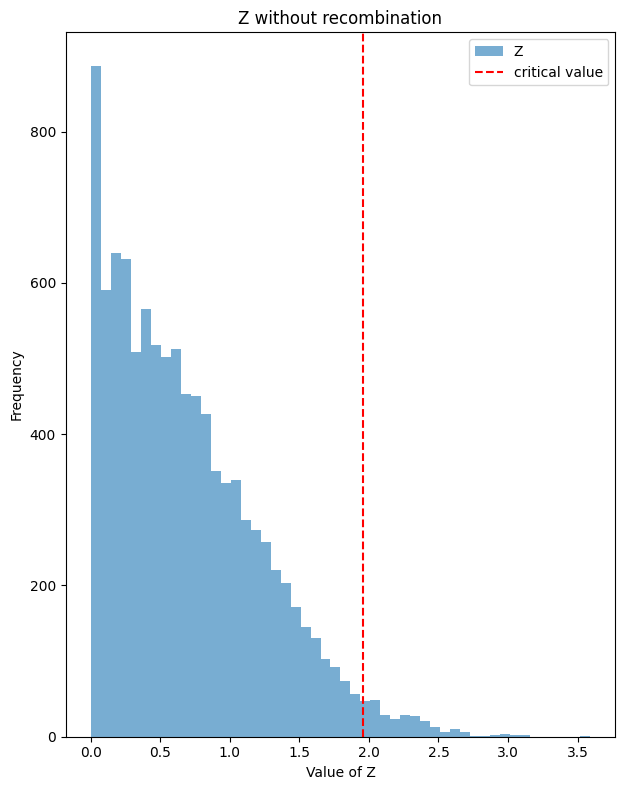

In [5]:
plt.figure(figsize=(12, 8))

# plt.subplot(1, 2, 1)
# plt.hist(list_S, bins=100, alpha=0.6, label="S")
# plt.xlabel("Value of S")
# plt.ylabel("Frequency")
# plt.legend()
# plt.title("S without recombination")

plt.subplot(1, 2, 2)
plt.hist(list_Z, bins=50, alpha=0.6, label="Z")
plt.axvline(x=1.96, color='r', linestyle='--',label='critical value')
plt.xlabel("Value of Z")
plt.ylabel("Frequency")
plt.legend()
plt.title("Z without recombination")

plt.tight_layout()
plt.show()